In [1]:
#Load reference structure
structure1 = '/home/lmacaya/Escritorio/hGR/hGR_MD_2/hGR_popcwi_eq.pdb' #Modificar ruta de archivo

In [2]:
#Load trajectory file (.dcd)
trj1 = '/media/lmacaya/Elements/hGR_MD_2/run/hGR_popcwi_md_200ns.dcd' #Modifcar ruta de archivo

In [3]:
class RMSD:
    def __init__(self, name):
        """Get RMSD from trajectory and RMSD plot."""
        self.name = name
    def get_RMSD(self, structure, trj):
        """Calculate protein C-alpha RMSD."""
        import pylab
        import prody as pd
        pylab.ion()
        
        structure = pd.parsePDB(structure) 
        trj = pd.parseDCD(trj)
        
        trj.setAtoms(structure.calpha)
        trj.setCoords(structure)
        trj.superpose()
        
        rmsd = trj.getRMSDs()
        
        return trj, rmsd
    
    def RMSD_plot(self, ens, rmsd, mds_time):
        """RMSD plot."""
        %matplotlib inline
        import matplotlib.pyplot as plt
        import numpy as np
        
        fig, axes = plt.subplots()
        
        time = []
        frames = ens.numConfs()
        ts = mds_time / frames
        
        i = 0
        
        while i <= mds_time:
            time.append(i)
            i += round(ts, 2) 
        
        axes.plot(time, rmsd, "r-", linewidth = 1, alpha = 0.8, label = "RMSD %s" % self.name)
        axes.set_xlabel("$Time\ (ns)$")
        axes.set_ylabel("$RMSD\ ($\AA$)$")
        axes.set_title("$RMSD\ %s\ C-alpha$" % self.name)
        axes.legend(loc=2)
        #ax.axvline(x=263,color='k',ls='dashed')
        #ax.axvline(x=513,color='k',ls='dashed')
        fig.savefig('/home/lmacaya/Escritorio/RMSD_%s.png' % self.name, dpi=1000)
        return

In [4]:
protein = RMSD('hGR')

In [5]:
prot_rmsd = protein.get_RMSD(structure1, trj1)

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
@> 280072 atoms and 1 coordinate set(s) were parsed in 1.89s.
@> DCD file contains 801 coordinate sets for 280072 atoms.
@> DCD file was parsed in 25.56 seconds.
@> 2567.40 MB parsed at input rate 100.44 MB/s.
@> 801 coordinate sets parsed at input rate 31 frame/s.
@> Superposition completed in 6.95 seconds.


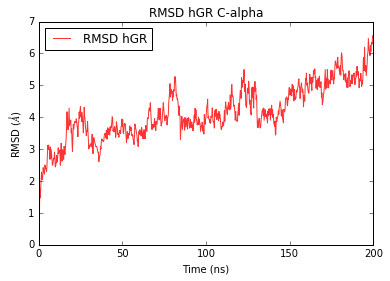

In [6]:
numConf, rmsd = prot_rmsd
plot = protein.RMSD_plot(numConf, rmsd, 200.0)

## Classic RMSD Evaluation

In [ ]:
from prody import *
from pylab import *
ion()

In [ ]:
structure = parsePDB('mdm2.pdb')
repr(structure)

In [ ]:
ensemble = parseDCD('mdm2.dcd')
repr(ensemble)

In [ ]:
ensemble.setAtoms(structure.calpha)
repr(ensemble)

In [ ]:
ensemble.superpose()

In [ ]:
rmsd = ensemble.getRMSDs()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots()

"""time = []
frames = ens.numConfs()
ts = mds_time / frames

i = 0

while i <= mds_time:
    time.append(i)
    i += round(ts, 2) 
"""
axes.plot(rmsd, "r-", linewidth = 1, alpha = 0.8, label = "RMSD %s" % name)
axes.set_xlabel("$Time\ (ns)$")
axes.set_ylabel("$RMSD\ ($\AA$)$")
axes.set_title("$RMSD\ %s\ C-alpha$" % name)
axes.legend(loc=2)
#ax.axvline(x=263,color='k',ls='dashed')
#ax.axvline(x=513,color='k',ls='dashed')
fig.savefig('/home/lmacaya/Escritorio/RMSD_%s.png' % name, dpi=1000)